import包，加入一些初始设定

In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

上次的数据集有点小啦，咱们这里用一个大一点的数据集，比如[NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [2]:
complaints = pd.read_csv('../data/311-service-requests.csv')

/opt/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1070: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


其实warning暂时可以不用管，一般是python版本的问题

# 2.1 瞄一眼数据

dataframe这种格式还是很神奇的，比如说，你要是直接把dataframe丢出去输出一下，它会告诉你最基本的信息。

比如有多少行多少列，有多少非空的值等等。

In [3]:
complaints

Unique Key            Created Date             Closed Date Agency                                        Agency Name            Complaint Type                        Descriptor                  Location Type Incident Zip           Incident Address          Street Name     Cross Street 1                    Cross Street 2 Intersection Street 1 Intersection Street 2  Address Type                 City Landmark Facility Type    Status                Due Date Resolution Action Updated Date       Community Board        Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name   Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                  Location
0     26589651  10/31/2013 02:08:41 AM                     NaN   NYPD                    New York City Police Department   Noise - Street/Sidewalk                      Loud Talking                Street/Sidewalk        11432           90-03 169 STREET           169 STREET          90 AVENUE                         91 AVENUE                   NaN                   NaN       ADDRESS              JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM             12 QUEENS         QUEENS                     1042027                      197389        Unspecified         QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.708275 -73.791604   (40.70827532593202, -73.79160395779721)
1     26593698  10/31/2013 02:01:04 AM                     NaN   NYPD                    New York City Police Department           Illegal Parking      Commercial Overnight Parking                Street/Sidewalk        11378                  58 AVENUE            58 AVENUE           58 PLACE                         59 STREET                   NaN                   NaN     BLOCKFACE              MASPETH      NaN      Precinct      Open  10/31/2013 10:01:04 AM                            NaN             05 QUEENS         QUEENS                     1009349                      201984        Unspecified         QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.721041 -73.909453  (40.721040535628305, -73.90945306791765)
2     26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD                    New York City Police Department        Noise - Commercial                  Loud Music/Party            Club/Bar/Restaurant        10032              4060 BROADWAY             BROADWAY    WEST 171 STREET                   WEST 172 STREET                   NaN                   NaN       ADDRESS             NEW YORK      NaN      Precinct    Closed  10/31/2013 10:00:24 AM         10/31/2013 02:39:42 AM          12 MANHATTAN      MANHATTAN                     1001088                      246531        Unspecified      MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 Na

# 2.2 选行或者列

上一节提到了，直接用名字就可以取。

In [4]:
complaints['Complaint Type']

0      Noise - Street/Sidewalk
1              Illegal Parking
2           Noise - Commercial
3              Noise - Vehicle
4                       Rodent
5           Noise - Commercial
6             Blocked Driveway
7           Noise - Commercial
8           Noise - Commercial
9           Noise - Commercial
10    Noise - House of Worship
11          Noise - Commercial
12             Illegal Parking
13             Noise - Vehicle
14                      Rodent
...
111054    Noise - Street/Sidewalk
111055         Noise - Commercial
111056      Street Sign - Missing
111057                      Noise
111058         Noise - Commercial
111059    Noise - Street/Sidewalk
111060                      Noise
111061         Noise - Commercial
111062               Water System
111063               Water System
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type,

相信大家对python中list的切片操作非常熟悉，这里也一样，比如你要取前5条数据，直接用`df[:5]`即可。

拿前几条数据出来的原因是，我们可以先熟悉熟悉数据，为后期做分析热热身。

In [5]:
complaints[:5]

Unique Key            Created Date             Closed Date Agency                              Agency Name           Complaint Type                    Descriptor        Location Type Incident Zip  Incident Address      Street Name   Cross Street 1                    Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type      City Landmark Facility Type    Status                Due Date Resolution Action Updated Date Community Board    Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                  Location
0    26589651  10/31/2013 02:08:41 AM                     NaN   NYPD          New York City Police Department  Noise - Street/Sidewalk                  Loud Talking      Street/Sidewalk        11432  90-03 169 STREET       169 STREET        90 AVENUE                         91 AVENUE                   NaN                   NaN      ADDRESS   JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM       12 QUEENS     QUEENS                     1042027                      197389        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.708275 -73.791604   (40.70827532593202, -73.79160395779721)
1    26593698  10/31/2013 02:01:04 AM                     NaN   NYPD          New York City Police Department          Illegal Parking  Commercial Overnight Parking      Street/Sidewalk        11378         58 AVENUE        58 AVENUE         58 PLACE                         59 STREET                   NaN                   NaN    BLOCKFACE   MASPETH      NaN      Precinct      Open  10/31/2013 10:01:04 AM                            NaN       05 QUEENS     QUEENS                     1009349                      201984        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.721041 -73.909453  (40.721040535628305, -73.90945306791765)
2    26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD          New York City Police Department       Noise - Commercial              Loud Music/Party  Club/Bar/Restaurant        10032     4060 BROADWAY         BROADWAY  WEST 171 STREET                   WEST 172 STREET                   NaN                   NaN      ADDRESS  NEW YORK      NaN      Precinct    Closed  10/31/2013 10:00:24 AM         10/31/2013 02:39:42 AM    12 MANHATTAN  MANHATTAN                     1001088                      246531        Unspecified    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.843330 -73.939144   (40.84332975466513, -73.93914371913482)
3    26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD          New Y

合并一下，取出某一列的前5行:

In [6]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

另外你先取列再切片 和 先切片再取列，其实是一样一样的。

In [7]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

# 2.3 选多行

选一行是把这一行的名字告诉它，那选多行呢？恩，传一个名称list给他咯。

In [8]:
complaints[['Complaint Type', 'Borough']]

Complaint Type        Borough
0    Noise - Street/Sidewalk         QUEENS
1            Illegal Parking         QUEENS
2         Noise - Commercial      MANHATTAN
3            Noise - Vehicle      MANHATTAN
4                     Rodent      MANHATTAN
5         Noise - Commercial         QUEENS
6           Blocked Driveway         QUEENS
7         Noise - Commercial         QUEENS
8         Noise - Commercial      MANHATTAN
9         Noise - Commercial       BROOKLYN
10  Noise - House of Worship       BROOKLYN
11        Noise - Commercial      MANHATTAN
12           Illegal Parking      MANHATTAN
13           Noise - Vehicle          BRONX
14                    Rodent       BROOKLYN
15  Noise - House of Worship      MANHATTAN
16   Noise - Street/Sidewalk  STATEN ISLAND
17           Illegal Parking       BROOKLYN
18    Street Light Condition       BROOKLYN
19        Noise - Commercial      MANHATTAN
20  Noise - House of Worship       BROOKLYN
21        Noise - Commercial      MANHATTAN
22           Noise - Vehicle         QUEENS
23        Noise - Commercial       BROOKLYN
24          Blocked Driveway  STATEN ISLAND
25   Noise - Street/Sidewalk  STATEN ISLAND
26    Street Light Condition       BROOKLYN
27      Harboring Bees/Wasps      MANHATTAN
28   Noise - Street/Sidewalk      MANHATTAN
29    Street Light Condition  STATEN ISLAND
30          Blocked Driveway  STATEN ISLAND
31   Noise - Street/Sidewalk       BROOKLYN
32            Taxi Complaint      MANHATTAN
33  Noise - House of Worship      MANHATTAN
34       Homeless Encampment      MANHATTAN
35          Blocked Driveway         QUEENS
36  Traffic Signal Condition       BROOKLYN
37        Noise - Commercial       BROOKLYN
38  Traffic Signal Condition       BROOKLYN
39          Blocked Driveway         QUEENS
40        Noise - Commercial         QUEENS
41        Food Establishment      MANHATTAN
42        Noise - Commercial       BROOKLYN
43        Noise - Commercial       BROOKLYN
44              Noise - Park          BRONX
45   Noise - Street/Sidewalk          BRONX
46        Noise - Commercial          BRONX
47            Taxi Complaint      MANHATTAN
48        Noise - Commercial      MANHATTAN
49   Noise - Street/Sidewalk       BROOKLYN
50        Noise - Commercial      MANHATTAN
51         Broken Muni Meter      MANHATTAN
52          Blocked Driveway       BROOKLYN
53        Noise - Commercial      MANHATTAN
54  Benefit Card Replacement    Unspecified
55        Noise - Commercial      MANHATTAN
56      Sanitation Condition       BROOKLYN
57                  ELECTRIC       BROOKLYN
58                  PLUMBING       BROOKLYN
59                   HEATING          BRONX
                         ...            ...

[111069 rows x 2 columns]

好吧，再拼一下：多列的前n行。

In [9]:
complaints[['Complaint Type', 'Borough']][:10]

Complaint Type    Borough
0  Noise - Street/Sidewalk     QUEENS
1          Illegal Parking     QUEENS
2       Noise - Commercial  MANHATTAN
3          Noise - Vehicle  MANHATTAN
4                   Rodent  MANHATTAN
5       Noise - Commercial     QUEENS
6         Blocked Driveway     QUEENS
7       Noise - Commercial     QUEENS
8       Noise - Commercial  MANHATTAN
9       Noise - Commercial   BROOKLYN

[10 rows x 2 columns]

# 2.4 想统计找出Top类型的数据？

dataframe真的很智能，比如你告诉它，我要统计一下数量了！（用`.value_counts()`函数），那它就帮你统计数量了：

In [10]:
complaints['Complaint Type'].value_counts()

HEATING                     14200
GENERAL CONSTRUCTION         7471
Street Light Condition       7117
DOF Literature Request       5797
PLUMBING                     5373
PAINT - PLASTER              5149
Blocked Driveway             4590
NONCONST                     3998
Street Condition             3473
Illegal Parking              3343
Noise                        3321
Traffic Signal Condition     3145
Dirty Conditions             2653
Water System                 2636
Noise - Commercial           2578
...
Opinion for the Mayor                2
Window Guard                         2
DFTA Literature Request              2
Legal Services Provider Complaint    2
Open Flame Permit                    1
Snow                                 1
Municipal Parking Facility           1
X-Ray Machine/Equipment              1
Stalled Sites                        1
DHS Income Savings Requirement       1
Tunnel Condition                     1
Highway Sign - Damaged               1
Ferry Permit      

注意哈，咱们拿到的结果是排过序的，也就是说如果我只要top 10的话，其实截断一下就可以了：

In [11]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
dtype: int64

哈哈，聪明的你一定想到上一节说的绘图，是的，咱们可以把top10画出来。

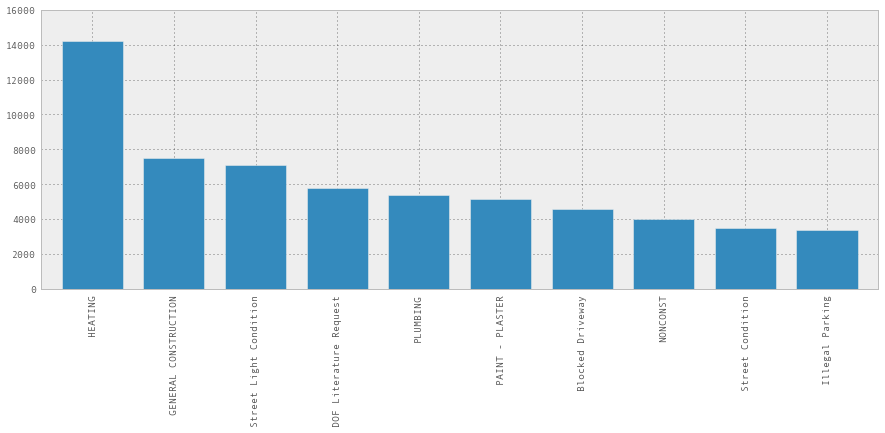

In [12]:
complaint_counts[:10].plot(kind='bar')

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  